# Análise de gênero e raça de candidaturas das eleições de 2018 com Pandas


Código utilizado para apresentação na AfroPythonConf 2022. Os dados podem ser obtidos no Portal de Dados Abertos do TSE: https://dadosabertos.tse.jus.br/


In [10]:
import pandas as pd
import matplotlib.pyplot as plt

low_memory=False

O atributo <span style="font-family:Courier">shape</span> retorna as dimensões do dataframe. Dessa forma, podemos ter uma visão inicial da quantidade de registros de candidaturas e dos atributos que as identificam.
O resultado (29180, 63) indica que o arquivo possui 29180 registros de candidaturas e 63 atributos.

In [13]:
df = pd.read_csv("consulta_cand_2018\consulta_cand_2018_BRASIL.csv", delimiter=";", encoding="ISO-8859-1", low_memory=False)
df.shape

(29180, 63)

O atributo <span style="font-family:Courier">columns</span> retorna as colunas do dataframe. Assim, podemos saber quais são os 63 atributos que descrevem os registros de candidaturas.

In [15]:
df.columns

Index(['DT_GERACAO', 'HH_GERACAO', 'ANO_ELEICAO', 'CD_TIPO_ELEICAO',
       'NM_TIPO_ELEICAO', 'NR_TURNO', 'CD_ELEICAO', 'DS_ELEICAO', 'DT_ELEICAO',
       'TP_ABRANGENCIA', 'SG_UF', 'SG_UE', 'NM_UE', 'CD_CARGO', 'DS_CARGO',
       'SQ_CANDIDATO', 'NR_CANDIDATO', 'NM_CANDIDATO', 'NM_URNA_CANDIDATO',
       'NM_SOCIAL_CANDIDATO', 'NR_CPF_CANDIDATO', 'NM_EMAIL',
       'CD_SITUACAO_CANDIDATURA', 'DS_SITUACAO_CANDIDATURA',
       'CD_DETALHE_SITUACAO_CAND', 'DS_DETALHE_SITUACAO_CAND', 'TP_AGREMIACAO',
       'NR_PARTIDO', 'SG_PARTIDO', 'NM_PARTIDO', 'SQ_COLIGACAO',
       'NM_COLIGACAO', 'DS_COMPOSICAO_COLIGACAO', 'CD_NACIONALIDADE',
       'DS_NACIONALIDADE', 'SG_UF_NASCIMENTO', 'CD_MUNICIPIO_NASCIMENTO',
       'NM_MUNICIPIO_NASCIMENTO', 'DT_NASCIMENTO', 'NR_IDADE_DATA_POSSE',
       'NR_TITULO_ELEITORAL_CANDIDATO', 'CD_GENERO', 'DS_GENERO',
       'CD_GRAU_INSTRUCAO', 'DS_GRAU_INSTRUCAO', 'CD_ESTADO_CIVIL',
       'DS_ESTADO_CIVIL', 'CD_COR_RACA', 'DS_COR_RACA', 'CD_OCUPACAO',
       '

Para exibir os dados de uma respectiva coluna, por exemplo, os cargos

In [16]:
df['DS_CARGO']

0          DEPUTADO FEDERAL
1          DEPUTADO FEDERAL
2        DEPUTADO DISTRITAL
3         DEPUTADO ESTADUAL
4        DEPUTADO DISTRITAL
                ...        
29175     DEPUTADO ESTADUAL
29176     DEPUTADO ESTADUAL
29177     DEPUTADO ESTADUAL
29178     DEPUTADO ESTADUAL
29179     DEPUTADO ESTADUAL
Name: DS_CARGO, Length: 29180, dtype: object

Podemos também pedir para exibir apenas as categorias que existem nesta coluna

In [17]:
df['DS_CARGO'].unique()

array(['DEPUTADO FEDERAL', 'DEPUTADO DISTRITAL', 'DEPUTADO ESTADUAL',
       '2º SUPLENTE', 'SENADOR', 'VICE-GOVERNADOR', 'GOVERNADOR',
       '1º SUPLENTE', 'PRESIDENTE', 'VICE-PRESIDENTE'], dtype=object)

Para ver ordenadamente:

In [18]:
sorted(df['DS_CARGO'].unique())

['1º SUPLENTE',
 '2º SUPLENTE',
 'DEPUTADO DISTRITAL',
 'DEPUTADO ESTADUAL',
 'DEPUTADO FEDERAL',
 'GOVERNADOR',
 'PRESIDENTE',
 'SENADOR',
 'VICE-GOVERNADOR',
 'VICE-PRESIDENTE']

Vamos explorar outras duas colunas (que iremos chamar de atributos a partir daqui) que nos ajudarão nas análises:

- DS_SITUACAO_CANDIDATURA -> Identifica a situação da candidatura (Apto ou Inapto a concorrer as eleições)
- DS_GENERO -> Identifica a autodeclaração de gênero da pessoa candidata
- DS_COR_RACA -> Identifica a autodeclaração de cor/raça da pessoa candidata

In [19]:
sorted(df['DS_SITUACAO_CANDIDATURA'].unique())

['APTO', 'INAPTO']

In [20]:
sorted(df['DS_GENERO'].unique())

['FEMININO', 'MASCULINO', 'NÃO DIVULGÁVEL']

In [21]:
sorted(df['DS_COR_RACA'].unique())

['AMARELA', 'BRANCA', 'INDÍGENA', 'NÃO DIVULGÁVEL', 'PARDA', 'PRETA']

Podemos observar que algumas pessoas optaram por não declarar gênero e raça

Vamos explorar mais um pouco estes atributos. Com a função <span style="font-family:Courier">size()</span> conseguimos ver a quantidade de registros de candidatura para cada uma destas categorias.

In [22]:
df.groupby('DS_CARGO').size()

DS_CARGO
1º SUPLENTE             398
2º SUPLENTE             405
DEPUTADO DISTRITAL      981
DEPUTADO ESTADUAL     17941
DEPUTADO FEDERAL       8588
GOVERNADOR              230
PRESIDENTE               16
SENADOR                 369
VICE-GOVERNADOR         236
VICE-PRESIDENTE          16
dtype: int64

Para cargo, podemos observar que Deputado Estadual foi o cargo com maior número de registros de candidaturas e a chapa Presidente/Vice-Presidente com menor número.

Para a situação dos registros de candidaturas, podemos observar que foram 26156 consideradas aptas a concorrer às eleições e 26156 inaptas

In [23]:
df.groupby('DS_SITUACAO_CANDIDATURA').size()

DS_SITUACAO_CANDIDATURA
APTO      26156
INAPTO     3024
dtype: int64

Para gênero, podemos ver que de forma geral a quantidade de registros de candidaturas femininas (9221) foi bem abaixo das masculinas (19958).

In [24]:
df.groupby('DS_GENERO').size()

DS_GENERO
FEMININO           9221
MASCULINO         19958
NÃO DIVULGÁVEL        1
dtype: int64

Para cor/raça, podemos ver que a maioria dos registros foi de pessoas que se autodeclaram brancas, seguido de pessoas que se autodeclaram pardas e pretas. A soma dos registros de candidaturas pardas e pretas resulta em 13.569, que ainda é inferior a quantidade de registros de candidaturas brancas.

In [25]:
df.groupby('DS_COR_RACA').size()

DS_COR_RACA
AMARELA             169
BRANCA            15307
INDÍGENA            134
NÃO DIVULGÁVEL        1
PARDA             10406
PRETA              3163
dtype: int64

Vamos agora aplicar filtros, para exibir o total apenas de registros de candidaturas APTAS para cada cargo:

In [28]:
filtro = (df['DS_SITUACAO_CANDIDATURA'] == 'APTO')
df_filtrado = df[filtro]

df_filtrado.groupby('DS_CARGO').size()

DS_CARGO
1º SUPLENTE             327
2º SUPLENTE             329
DEPUTADO DISTRITAL      917
DEPUTADO ESTADUAL     16156
DEPUTADO FEDERAL       7647
GOVERNADOR              212
PRESIDENTE               15
SENADOR                 325
VICE-GOVERNADOR         213
VICE-PRESIDENTE          15
dtype: int64

Para seguir na nossa análise, vamos selecionar um cargo. Assim, daremos continuidade com o cargo que possui a maior quantidade de candidaturas, ou seja, Deputado Estadual. <br>
Nosso próximo passo é criar um outro filtro:

In [29]:
filtro = (df['DS_SITUACAO_CANDIDATURA'] == 'APTO')
filtro2 = (df['DS_CARGO'] == 'DEPUTADO ESTADUAL')
df_filtrado = df[filtro & filtro2]

df_filtrado.groupby('DS_CARGO').size()

DS_CARGO
DEPUTADO ESTADUAL    16156
dtype: int64

Vamos exibir a quantidade de candidaturas aptas para deputado estadual de acordo com gênero e raça.<br>
Podemos notar que existiram candidaturas em todas as categorias de autodeclaração de gênero e raça, com a predominância de candidaturas homens brancos, seguido de homens pardos e mulheres brancas.<br>
A soma de candidaturas de homens pardos e pretos resulta em 5390, que ainda é inferior a de candidaturas de homens brancos.<br>
A soma de candidaturas de mulheres pardas e pretas resulta em 2477, que é mais próximo, porém ainda inferior a de candidaturas de mulheres brancas.<br>

In [30]:
df_filtrado.groupby(['DS_GENERO', 'DS_COR_RACA']).size()

DS_GENERO  DS_COR_RACA
FEMININO   AMARELA          25
           BRANCA         2500
           INDÍGENA         26
           PARDA          1824
           PRETA           653
MASCULINO  AMARELA          60
           BRANCA         5635
           INDÍGENA         43
           PARDA          4293
           PRETA          1097
dtype: int64

Vamos agora plotar esses resultados, para visualizar este resultado.<br> 

Para tanto, iremos utilizar a biblioteca matplotlib e plotar um gráfico de barras horizontal e ordenado.

<AxesSubplot:ylabel='DS_GENERO,DS_COR_RACA'>

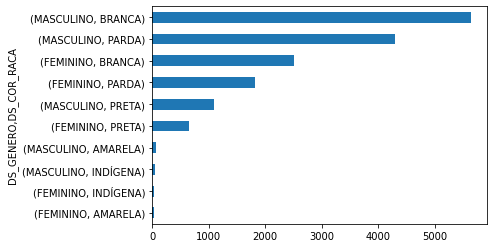

In [31]:
df_filtrado.groupby(['DS_GENERO', 'DS_COR_RACA']).size().sort_values().plot(kind="barh")

Vamos visualizar agora apenas as candidaturas eleitas. Para tanto, vamos exibir as categorias em DS_SIT_TOT_TURNO para o cargo de deputado estadual.

In [34]:
df_filtrado['DS_SIT_TOT_TURNO'].unique()

array(['SUPLENTE', 'NÃO ELEITO', 'ELEITO POR MÉDIA', 'ELEITO POR QP'],
      dtype=object)

Por se tratar de uma eleição proporcional, os possíveis resultados para candidaturas eleitas a deputado estadual são 'ELEITO POR MÉDIA' e 'ELEITO POR QP'. Assim, vamos utilizar essas duas possibilidades para filtrar apenas as pessoas eleitas.

<AxesSubplot:ylabel='DS_GENERO,DS_COR_RACA'>

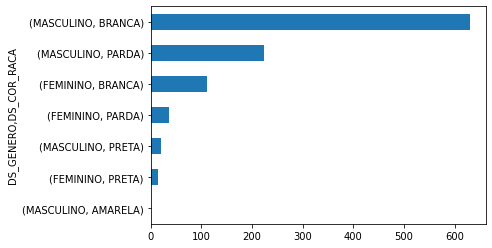

In [40]:
filtro = (df['DS_SITUACAO_CANDIDATURA'] == 'APTO')
filtro2 = (df['DS_CARGO'] == 'DEPUTADO ESTADUAL')
filtro3 = ((df['DS_SIT_TOT_TURNO'] == 'ELEITO POR MÉDIA') | (df['DS_SIT_TOT_TURNO'] == 'ELEITO POR QP'))
df_filtrado = df[filtro & filtro2 & filtro3]

df_filtrado.groupby(['DS_GENERO', 'DS_COR_RACA']).size().sort_values().plot(kind="barh")

Pelo plot acima, podemos notar que a quandidade de homens brancos eleitos foi um pouco mais que o dobro da de homens pardos.

Por fim, vamos exibir a quantidade de candidaturas inaptas.

In [41]:
filtro = (df['DS_SITUACAO_CANDIDATURA'] == 'INAPTO')
df_filtrado = df[filtro]

df_filtrado.groupby('DS_CARGO').size()

DS_CARGO
1º SUPLENTE             71
2º SUPLENTE             76
DEPUTADO DISTRITAL      64
DEPUTADO ESTADUAL     1785
DEPUTADO FEDERAL       941
GOVERNADOR              18
PRESIDENTE               1
SENADOR                 44
VICE-GOVERNADOR         23
VICE-PRESIDENTE          1
dtype: int64

Destes totais, vamos visualizar a quantidade de candidaturas inaptas por gênero e raça. Para diferenciar, dessa vez vamos definir uma cor diferente para as barras.

<AxesSubplot:ylabel='DS_GENERO,DS_COR_RACA'>

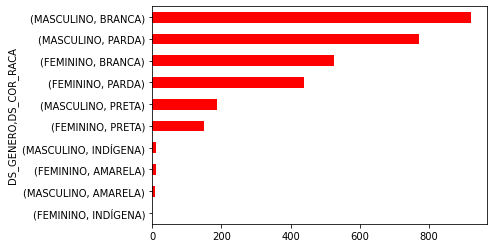

In [42]:
df_filtrado.groupby(['DS_GENERO', 'DS_COR_RACA']).size().sort_values().plot(kind="barh", color="red")

Como esperado, os recortes com maior número de candidaturas inaptas são os recortes com a maior quantidade de registros. Assim, vamos olhar esses dados por um outro ângulo. Do total de registros dentro de cada recorte de raça e gênero, qual possuiu o maior percentual de inaptos?

<AxesSubplot:ylabel='DS_GENERO,DS_COR_RACA'>

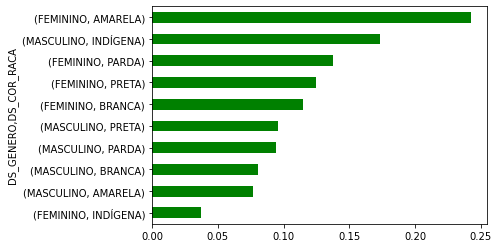

In [58]:
filtro1 = (df['DS_SITUACAO_CANDIDATURA'] == 'INAPTO')
filtro2 = (df['DS_CARGO'] == 'DEPUTADO ESTADUAL')
df_inaptos = df[filtro1 & filtro2]

df_todos = df[filtro2]

df_inaptos_totais = df_inaptos.groupby(['DS_GENERO', 'DS_COR_RACA']).size()
df_totais = df_todos.groupby(['DS_GENERO', 'DS_COR_RACA']).size()

df_resultados = df_inaptos_totais/df_totais
df_resultados.sort_values().plot(kind="barh", color="green")


Por este gráfico final, podemos observar que os recortes que possuíram maior percentual de candidaturas inaptas foram de mulheres amarelas, homens indígenas e mulheres pardas e pretas.